In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Data Collection

In [3]:
tsv_file_paths = ['Data/title.basics.tsv', 'Data/title.ratings.tsv']

In [4]:
dfs = []
for file_path in tsv_file_paths:
    df = pd.read_csv(file_path, sep='\t', low_memory=False)
    dfs.append(df)

In [5]:
df2 = dfs[0]
df3 = dfs[1]

In [6]:
df4 = pd.read_json('Data/IMDB_reviews.json', lines=True)
df5 = pd.read_json('Data/IMDB_movie_details.json', lines=True)

In [7]:
df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10790736 entries, 0 to 10790735
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 740.9+ MB


In [9]:
df2.replace('\\N', pd.NA, inplace=True)

In [10]:
df2.isnull().sum()

tconst                   0
titleType                0
primaryTitle            19
originalTitle           19
isAdult                  1
startYear          1406804
endYear           10666898
runtimeMinutes     7443113
genres              480417
dtype: int64

In [11]:
df3.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2058
1,tt0000002,5.7,276
2,tt0000003,6.5,2015
3,tt0000004,5.4,179
4,tt0000005,6.2,2784


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440380 entries, 0 to 1440379
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1440380 non-null  object 
 1   averageRating  1440380 non-null  float64
 2   numVotes       1440380 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.0+ MB


In [13]:
df3.replace('\\N', pd.NA, inplace=True)

In [14]:
df3.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [15]:
final_df = pd.merge(df2, df3, on='tconst')

In [16]:
final_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short",5.7,2058
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short",5.7,276
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,5,"Animation,Comedy,Romance",6.5,2015
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short",5.4,179
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short",6.2,2784


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440380 entries, 0 to 1440379
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1440380 non-null  object 
 1   titleType       1440380 non-null  object 
 2   primaryTitle    1440380 non-null  object 
 3   originalTitle   1440380 non-null  object 
 4   isAdult         1440380 non-null  object 
 5   startYear       1440137 non-null  object 
 6   endYear         54416 non-null    object 
 7   runtimeMinutes  1017013 non-null  object 
 8   genres          1419742 non-null  object 
 9   averageRating   1440380 non-null  float64
 10  numVotes        1440380 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 120.9+ MB


In [18]:
final_df.isnull().sum()

tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear             243
endYear           1385964
runtimeMinutes     423367
genres              20638
averageRating           0
numVotes                0
dtype: int64

In [19]:
final_df.rename(columns={'tconst': 'movie_id'}, inplace=True)

In [20]:
df4.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 31.2+ MB


In [22]:
df4.rename(columns={'rating': 'review_rating'}, inplace=True)

In [23]:
df5.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [24]:
df5.drop(columns=['genre'], inplace=True)

In [25]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 0 to 1571
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   rating         1572 non-null   float64
 4   release_date   1572 non-null   object 
 5   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(5)
memory usage: 86.0+ KB


In [26]:
df5.rename(columns={'rating': 'overall_rating'}, inplace=True)

In [27]:
reviews_df = pd.merge(df4, df5, on='movie_id')
reviews_df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [28]:
new_df = pd.merge(final_df, reviews_df, on='movie_id')
new_df.head()

,movie_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis
0,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur1888886,True,"""The Kid"" is a powerfully emotional and wonder...",9,Smiling and Tearing,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
1,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur22131361,True,The Kid became a critically hailed internation...,10,The Kid was Charles Chaplin's first self-produ...,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
2,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur5560976,True,A tramp finds an abandoned kid on the street. ...,8,Inspiring plot,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
3,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur20815663,True,The Kid is a comedy film about a baby abandone...,8,One of Chaplins timeless films,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
4,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur20597997,True,It was one of the first few movies of 'The Tra...,9,Entertainment epitomized- I'm not 'Kid'ding,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573906 entries, 0 to 573905
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movie_id        573906 non-null  object 
 1   titleType       573906 non-null  object 
 2   primaryTitle    573906 non-null  object 
 3   originalTitle   573906 non-null  object 
 4   isAdult         573906 non-null  object 
 5   startYear       573906 non-null  object 
 6   endYear         8102 non-null    object 
 7   runtimeMinutes  573906 non-null  object 
 8   genres          573906 non-null  object 
 9   averageRating   573906 non-null  float64
 10  numVotes        573906 non-null  int64  
 11  review_date     573906 non-null  object 
 12  user_id         573906 non-null  object 
 13  is_spoiler      573906 non-null  bool   
 14  review_text     573906 non-null  object 
 15  review_rating   573906 non-null  int64  
 16  review_summary  573906 non-null  object 
 17  plot_summa

In [30]:
new_df.isnull().sum()

movie_id               0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear              0
endYear           565804
runtimeMinutes         0
genres                 0
averageRating          0
numVotes               0
review_date            0
user_id                0
is_spoiler             0
review_text            0
review_rating          0
review_summary         0
plot_summary           0
duration               0
overall_rating         0
release_date           0
plot_synopsis          0
dtype: int64

In [31]:
new_df.replace('\\N', pd.NA, inplace=True)

In [32]:
new_df.isnull().sum()

movie_id               0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear              0
endYear           565804
runtimeMinutes         0
genres                 0
averageRating          0
numVotes               0
review_date            0
user_id                0
is_spoiler             0
review_text            0
review_rating          0
review_summary         0
plot_summary           0
duration               0
overall_rating         0
release_date           0
plot_synopsis          0
dtype: int64

In [33]:
new_df.drop('endYear', axis=1, inplace=True)

In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573906 entries, 0 to 573905
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movie_id        573906 non-null  object 
 1   titleType       573906 non-null  object 
 2   primaryTitle    573906 non-null  object 
 3   originalTitle   573906 non-null  object 
 4   isAdult         573906 non-null  object 
 5   startYear       573906 non-null  object 
 6   runtimeMinutes  573906 non-null  object 
 7   genres          573906 non-null  object 
 8   averageRating   573906 non-null  float64
 9   numVotes        573906 non-null  int64  
 10  review_date     573906 non-null  object 
 11  user_id         573906 non-null  object 
 12  is_spoiler      573906 non-null  bool   
 13  review_text     573906 non-null  object 
 14  review_rating   573906 non-null  int64  
 15  review_summary  573906 non-null  object 
 16  plot_summary    573906 non-null  object 
 17  duration  

In [35]:
new_df.rename(columns={'movie_id': 'title_id'}, inplace=True)
new_df.head(1)

,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis
0,tt0012349,movie,The Kid,The Kid,0,1921,68,"Comedy,Drama,Family",8.2,135122,...,ur1888886,True,"""The Kid"" is a powerfully emotional and wonder...",9,Smiling and Tearing,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,


In [36]:
duplicate_rows = new_df[new_df.duplicated()]
duplicate_rows

,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis


## Visualize to gain insights

In [37]:
movie_count = new_df['title_id'].value_counts().reset_index()
movie_count.columns = ['title_id', 'review_count']

print("Movie Review Counts:")
movie_count

Movie Review Counts:


,title_id,review_count
0,tt0468569,4845
1,tt0111161,4361
2,tt0167260,2729
3,tt0137523,2480
4,tt0068646,2137
...,...,...
1565,tt0101301,15
1566,tt6868216,13
1567,tt0107719,12
1568,tt6294822,11


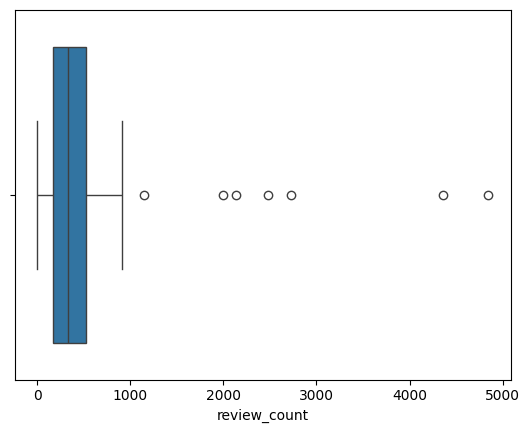

In [38]:
movie_views = movie_count[['review_count']]
sns.boxplot(data=movie_views, x='review_count')
plt.show()

In [39]:
user_count = new_df['user_id'].value_counts().reset_index()
user_count.columns = ['user_id', 'review_count']

print("User Review Counts:")
user_count

User Review Counts:


,user_id,review_count
0,ur2898520,1303
1,ur4248714,1021
2,ur0453068,806
3,ur60028700,770
4,ur20552756,755
...,...,...
263399,ur4075051,1
263400,ur8260047,1
263401,ur6488642,1
263402,ur8253641,1


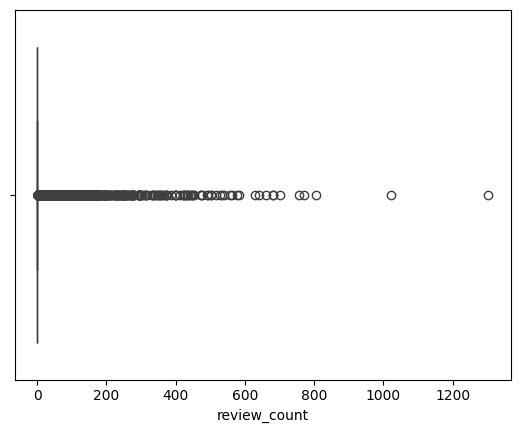

In [40]:
user_views = user_count[['review_count']]
sns.boxplot(data=user_views, x='review_count')
plt.show()

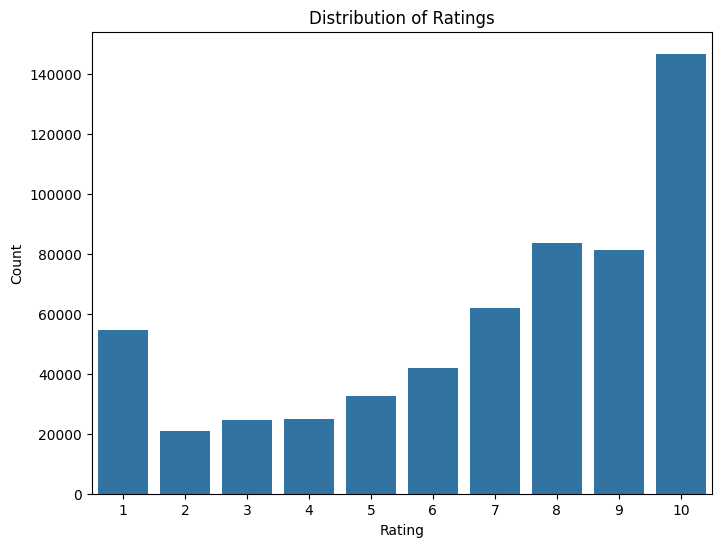

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='review_rating', data=new_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

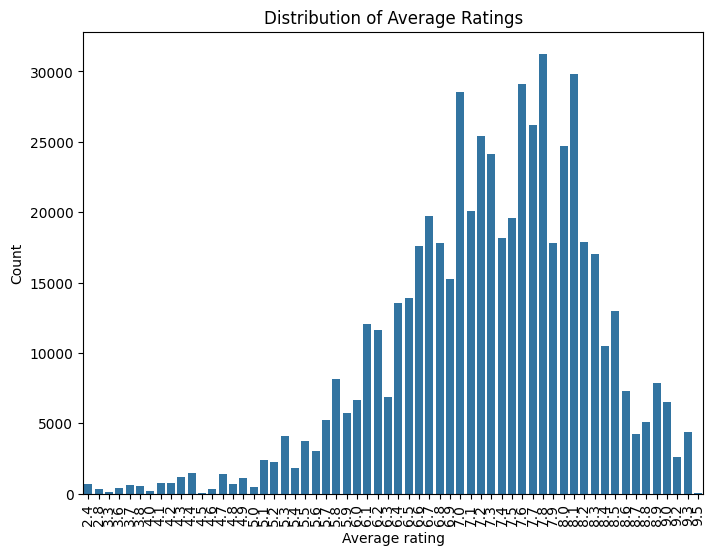

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='overall_rating', data=new_df)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [43]:
new_df['genres'] = new_df['genres'].str.split(',')
exploded_df = new_df.explode('genres')

In [44]:
genre_counts = exploded_df['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

print("Unique Genre Counts:")
genre_counts

Unique Genre Counts:


,genre,count
0,Drama,294790
1,Action,217198
2,Adventure,178436
3,Comedy,140514
4,Crime,102904
5,Sci-Fi,97795
6,Thriller,92450
7,Mystery,69928
8,Romance,69537
9,Fantasy,63783


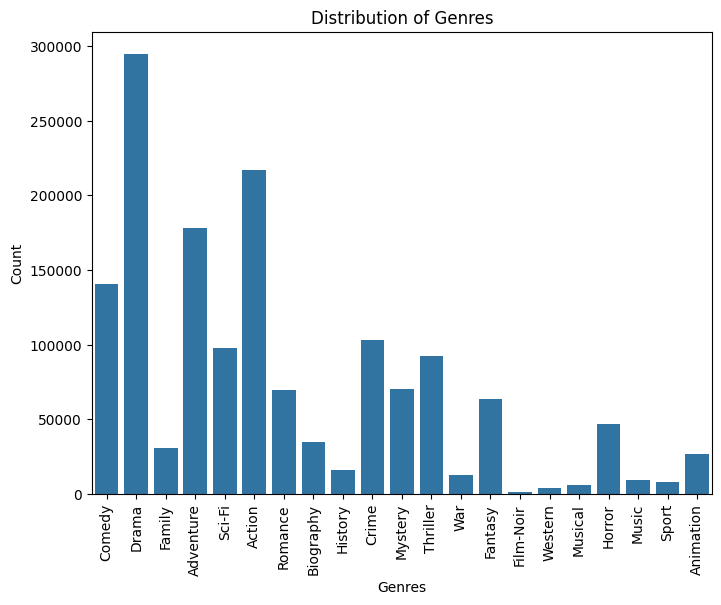

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='genres', data=exploded_df)
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Mean rating per user

In [46]:
new_df['review_rating'] = pd.to_numeric(new_df['review_rating'], errors='coerce')

In [47]:
mean_ratings = new_df.groupby('user_id')['review_rating'].mean().reset_index()
mean_ratings.columns = ['user_id', 'mean_rating']
mean_ratings

,user_id,mean_rating
0,ur0000002,7.000000
1,ur0000005,2.000000
2,ur0000011,7.400000
3,ur0000015,4.000000
4,ur0000022,9.000000
...,...,...
263399,ur9999020,5.666667
263400,ur9999060,6.000000
263401,ur9999158,8.000000
263402,ur9999345,8.000000


### Some users' favorite movies
If a user gave a higher rating than their mean rating to a movie, we assume that they liked the movie 

In [48]:
df_with_mean = pd.merge(new_df, mean_ratings, on=['user_id','user_id'])

In [49]:
df_with_mean.head()

,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis,mean_rating
0,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,True,"""The Kid"" is a powerfully emotional and wonder...",9,Smiling and Tearing,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,6.833333
1,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,True,The Kid became a critically hailed internation...,10,The Kid was Charles Chaplin's first self-produ...,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,8.648485
2,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,True,A tramp finds an abandoned kid on the street. ...,8,Inspiring plot,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,6.846154
3,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,True,The Kid is a comedy film about a baby abandone...,8,One of Chaplins timeless films,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,5.992857
4,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,True,It was one of the first few movies of 'The Tra...,9,Entertainment epitomized- I'm not 'Kid'ding,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,9.369565


In [50]:
user_favorites = df_with_mean.drop(df_with_mean[df_with_mean.review_rating < df_with_mean.mean_rating].index)
user_favorites = user_favorites[['user_id', 'primaryTitle', 'review_rating', 'mean_rating']]

In [51]:
print('Favorites for user with user_id: ur2898520')
user_favorites[user_favorites['user_id']== 'ur2898520'].sort_values(by='review_rating', ascending=False).head(10)

Favorites for user with user_id: ur2898520


,user_id,primaryTitle,review_rating,mean_rating
204,ur2898520,The Gold Rush,10,6.710668
19249,ur2898520,The Godfather,10,6.710668
95462,ur2898520,Toy Story,10,6.710668
8895,ur2898520,Rear Window,10,6.710668
96352,ur2898520,The Usual Suspects,10,6.710668
79365,ur2898520,Pulp Fiction,10,6.710668
52987,ur2898520,Terminator 2: Judgment Day,10,6.710668
14437,ur2898520,Lawrence of Arabia,10,6.710668
14890,ur2898520,To Kill a Mockingbird,10,6.710668
33338,ur2898520,The Terminator,10,6.710668


In [52]:
print('Favorites for user with user_id: ur20815663')
user_favorites[user_favorites['user_id']== 'ur20815663'].sort_values(by='review_rating', ascending=False).head(10)

Favorites for user with user_id: ur20815663


,user_id,primaryTitle,review_rating,mean_rating
241874,ur20815663,Spider-Man 2,10,5.992857
90717,ur20815663,GoldenEye,10,5.992857
358144,ur20815663,9,10,5.992857
378190,ur20815663,The Incredible Hulk,10,5.992857
126846,ur20815663,Blade,10,5.992857
422025,ur20815663,District 9,10,5.992857
439457,ur20815663,X-Men: First Class,10,5.992857
451959,ur20815663,Cloud Atlas,10,5.992857
169312,ur20815663,Hellboy,10,5.992857
310732,ur20815663,Hellboy II: The Golden Army,10,5.992857


## Experimenting with KMeans for user profiling and recommendations

In [53]:
features = df_with_mean[['averageRating', 'numVotes', 'review_rating', 'mean_rating']]

In [54]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [55]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

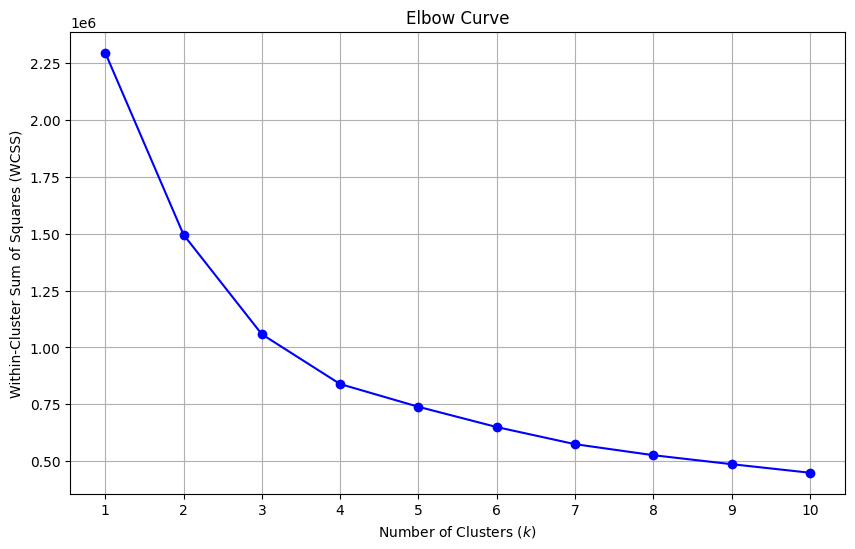

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters ($k$)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [57]:
# Since getting the silhouette score is so computationally expensive, we will make a sample
sample_size = 50000
np.random.seed(42)
indices = np.random.choice(features_scaled.shape[0], sample_size, replace=False)
features_sampled = features_scaled[indices]

In [58]:
from tqdm import tqdm

In [59]:
kmeans_per_k = {}
silhouette_scores = []
for k in tqdm(range(2, 11), desc="Calculating Silhouette Scores"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_sampled)
    kmeans_per_k[k] = kmeans
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features_sampled, cluster_labels))

Calculating Silhouette Scores: 100%|██████████| 9/9 [03:52<00:00, 25.84s/it]


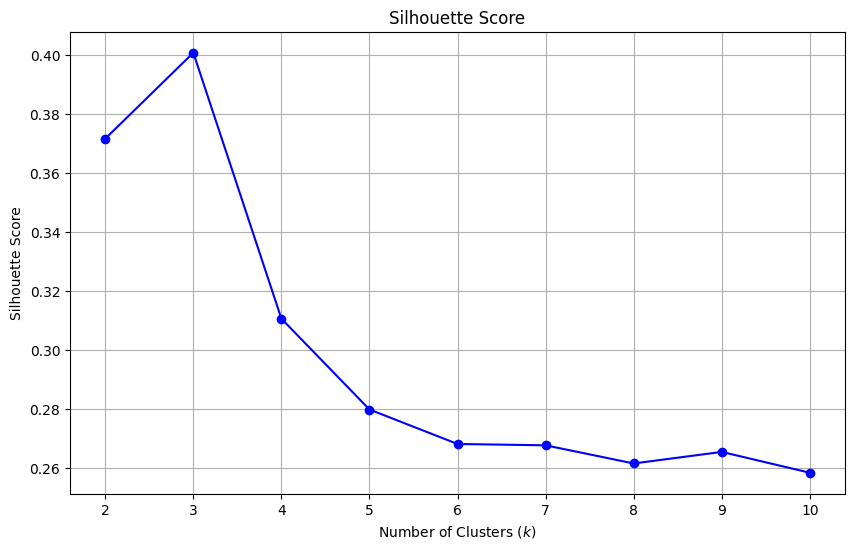

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters ($k$)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

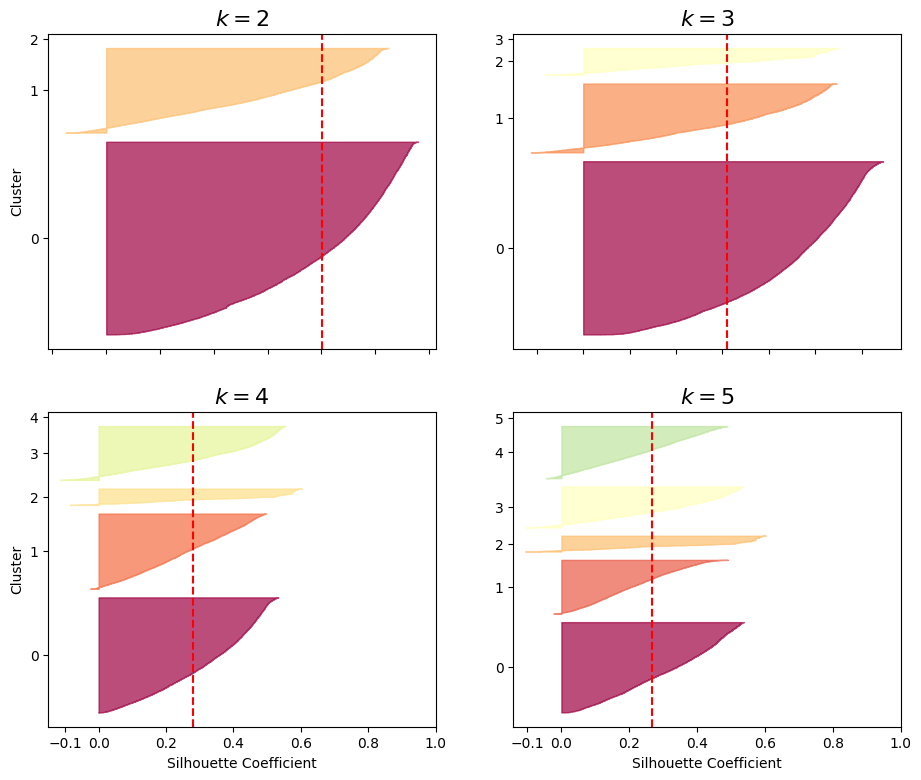

In [61]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(features_sampled, y_pred)

    padding = len(features_sampled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k-1), fontsize=16)

plt.show()

In [108]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features_scaled)

KMeans(n_clusters=3, random_state=42)

In [63]:
cluster_labels = kmeans.predict(features_scaled)

In [64]:
pca = PCA(n_components=2) #2D
pca_features = pca.fit_transform(features_scaled)

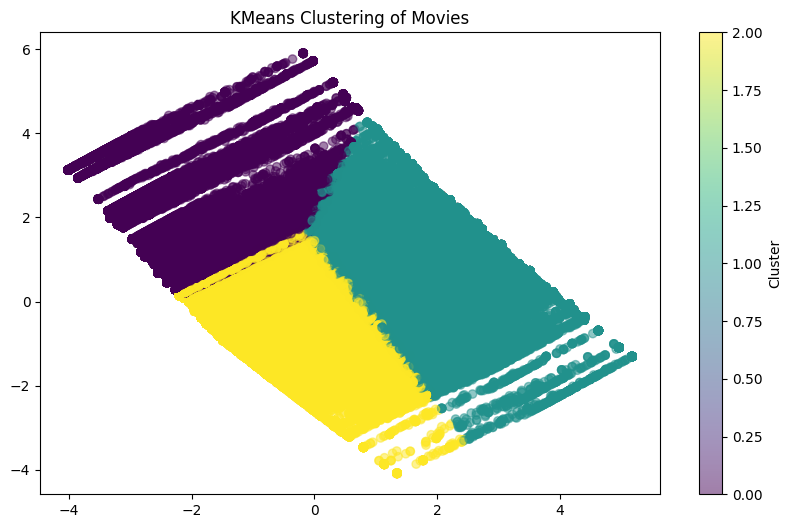

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering of Movies')
plt.colorbar(label='Cluster')
plt.show()

In [66]:
pca = PCA(n_components=3)  # 3D
pca_features_3d = pca.fit_transform(features_scaled)

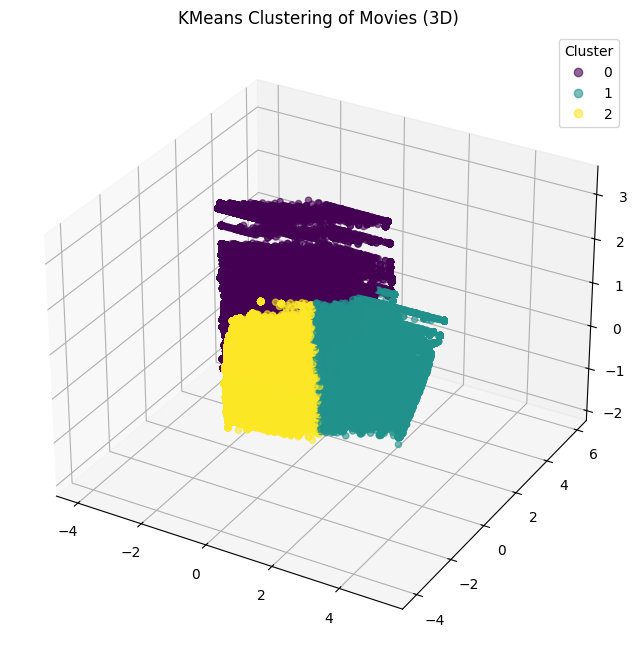

In [67]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_features_3d[:, 0], pca_features_3d[:, 1], pca_features_3d[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
ax.set_title('KMeans Clustering of Movies (3D)')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

## Predictions to movie recommendations

In [69]:
df_with_clusters = df_with_mean.copy()
df_with_clusters['cluster'] = cluster_labels

In [70]:
df_with_clusters.head()

,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis,mean_rating,cluster
0,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,"""The Kid"" is a powerfully emotional and wonder...",9,Smiling and Tearing,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,6.833333,2
1,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,The Kid became a critically hailed internation...,10,The Kid was Charles Chaplin's first self-produ...,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,8.648485,2
2,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,A tramp finds an abandoned kid on the street. ...,8,Inspiring plot,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,6.846154,2
3,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,The Kid is a comedy film about a baby abandone...,8,One of Chaplins timeless films,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,5.992857,2
4,tt0012349,movie,The Kid,The Kid,0,1921,68,"[Comedy, Drama, Family]",8.2,135122,...,It was one of the first few movies of 'The Tra...,9,Entertainment epitomized- I'm not 'Kid'ding,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,,9.369565,2


In [76]:
# Now let's make a new user and add some movies that they've seen and rated
user_has_watched = ['Terminator 2: Judgment Day', 'Fight Club', 'Zombieland']
user_rows = df_with_clusters[df_with_clusters['primaryTitle'].isin(user_has_watched)]
user_rows = user_rows.drop_duplicates(subset='primaryTitle', keep='first')
user_rows

,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis,mean_rating,cluster
52385,tt0103064,movie,Terminator 2: Judgment Day,Terminator 2: Judgment Day,0,1991,137,"[Action, Adventure, Sci-Fi]",8.6,1176877,...,I adore this movie. I could never stand action...,10,A piece of cinematic genius...,Over 10 years have passed since the first cybo...,2h 17min,8.5,1991-07-03,Scenes described in red text appear only in th...,5.500000,0
151400,tt0137523,movie,Fight Club,Fight Club,0,1999,139,[Drama],8.8,2331118,...,Please.This is a dismal movie. I'm going to s...,1,The comparison to Clockwork Orange makes me puke,A nameless first person narrator (Edward Norto...,2h 19min,8.8,1999-10-15,We back out of the webbing of neurons and brai...,1.000000,0
423710,tt1156398,movie,Zombieland,Zombieland,0,2009,88,"[Action, Comedy, Horror]",7.5,622890,...,"It's the zombie apocalypse. We meet Columbus, ...",5,Good Fun But More Toothless Than Ruthless,Searching for family. In the early twenty-firs...,1h 28min,7.7,2009-10-02,Earth's population has been decimated by a vir...,6.111111,1


In [77]:
user_rows.loc[:, 'user_id'] = 'test_ur000000'
user_rows.loc[:, 'review_rating'] = [3, 7, 8]
user_rows.drop(columns=['mean_rating'], inplace=True)
user_rows

,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis,cluster
52385,tt0103064,movie,Terminator 2: Judgment Day,Terminator 2: Judgment Day,0,1991,137,"[Action, Adventure, Sci-Fi]",8.6,1176877,...,True,I adore this movie. I could never stand action...,3,A piece of cinematic genius...,Over 10 years have passed since the first cybo...,2h 17min,8.5,1991-07-03,Scenes described in red text appear only in th...,0
151400,tt0137523,movie,Fight Club,Fight Club,0,1999,139,[Drama],8.8,2331118,...,True,Please.This is a dismal movie. I'm going to s...,7,The comparison to Clockwork Orange makes me puke,A nameless first person narrator (Edward Norto...,2h 19min,8.8,1999-10-15,We back out of the webbing of neurons and brai...,0
423710,tt1156398,movie,Zombieland,Zombieland,0,2009,88,"[Action, Comedy, Horror]",7.5,622890,...,True,"It's the zombie apocalypse. We meet Columbus, ...",8,Good Fun But More Toothless Than Ruthless,Searching for family. In the early twenty-firs...,1h 28min,7.7,2009-10-02,Earth's population has been decimated by a vir...,1


In [75]:
def top_10_recommended_movies(user_history_df):
    user_mean_ratings = user_history_df.groupby('user_id')['review_rating'].mean().reset_index()
    user_mean_ratings.columns = ['user_id', 'mean_rating']
    
    user_history_with_mean = pd.merge(user_history_df, user_mean_ratings, on='user_id', how='left')

    scaled_user_history = scaler.transform(user_history_with_mean[['averageRating', 'numVotes', 'review_rating', 'mean_rating']])
    user_cluster = kmeans.predict(scaled_user_history)[0]

    cluster_movies = df_with_clusters[df_with_clusters['cluster'] == user_cluster]
    recommended_movies = cluster_movies.sort_values(by='averageRating', ascending=False).head(10)
    return recommended_movies

In [78]:
recommended_movies = top_10_recommended_movies(user_rows)
print('The top 10 recommended movies for the new user:')
recommended_movies

The top 10 recommended movies for the new user:


,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis,mean_rating,cluster
82999,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,7/10By submitting this review you are agreeing...,7,The Best,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",7.000,0
83246,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,I had to dig this out of my old media library ...,8,Loved this Movie,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",8.000,0
83234,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,'The Shawshank Redemption' is a brilliant adap...,9,Great movie,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",9.000,0
83235,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,One of my favorite movie. There are several wo...,10,Best movie!,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",10.000,0
83236,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,This is my ALL TIME FAVORITE movie ever. My ch...,10,I even have a book that was in the library in ...,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",10.000,0
83237,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,It is a strange comment to make about a film s...,9,Andy has some initial difficulty adjusting to ...,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",9.000,0
83238,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,I have one word for this movie:brilliant! Ever...,10,10/10,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",10.000,0
83239,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,"""The Shawshank Redemption"" is one of the best ...",10,One of the most absorbing movies I have ever w...,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",10.000,0
83240,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,"OK, so before i get started i'd like to say th...",10,Well deserved,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",9.000,0
83241,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,"One of the finest films ever made, it has a st...",9,The Shawshank Redemption,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",8.625,0


Since all movies where the same movie, we'll try again, but without duplicates

In [105]:
df_with_cluster_no_dups = df_with_clusters.drop_duplicates(subset='primaryTitle', keep='first')

In [106]:
def top_10_recommended_movies(user_history_df):
    user_mean_ratings = user_history_df.groupby('user_id')['review_rating'].mean().reset_index()
    user_mean_ratings.columns = ['user_id', 'mean_rating']
    
    user_history_with_mean = pd.merge(user_history_df, user_mean_ratings, on='user_id', how='left')

    scaled_user_history = scaler.transform(user_history_with_mean[['averageRating', 'numVotes', 'review_rating', 'mean_rating']])
    user_cluster = kmeans.predict(scaled_user_history)[0]

    cluster_movies = df_with_cluster_no_dups[df_with_cluster_no_dups['cluster'] == user_cluster]
    recommended_movies = cluster_movies.sort_values(by='averageRating', ascending=False).head(10)
    return recommended_movies

In [109]:
recommended_movies = top_10_recommended_movies(user_rows)
print('The top 10 recommended movies for the new user:')
recommended_movies

The top 10 recommended movies for the new user:


,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis,mean_rating,cluster
80757,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,[Drama],9.3,2896876,...,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",8.200000,0
18773,tt0068646,movie,The Godfather,The Godfather,0,1972,175,"[Crime, Drama]",9.2,2018419,...,Rather than concentrating on everything that i...,10,"""The Godfather"" is pretty much flawless, and o...",When the aging head of a famous crime family d...,2h 55min,9.2,1972-03-24,"In late summer 1945, guests are gathered for t...",6.400000,0
467352,tt1475582,tvSeries,Sherlock,Sherlock,0,2010,90,"[Crime, Drama, Mystery]",9.1,1002472,...,"As a die-hard fan of the source material, I ha...",10,"Sounds like a bad idea, right? Think again. Th...",In this modernized version of the Conan Doyle ...,1h 28min,9.2,2010-07-27,Series 1Wounded Afghan veteran Dr. John Watson...,10.000000,0
9428,tt0050083,movie,12 Angry Men,12 Angry Men,0,1957,96,"[Crime, Drama]",9.0,867870,...,An excellent courtroom drama with a unique twi...,10,Excellent,The defense and the prosecution have rested an...,1h 36min,8.9,1957-04,"In a New York City courthouse, an eighteen-yea...",7.666667,0
21619,tt0071562,movie,The Godfather Part II,The Godfather Part II,0,1974,202,"[Crime, Drama]",9.0,1367504,...,"Coppola's masterpiece is rivaled only by ""The ...",10,Breathtaking in its scope and tragic grandeur...,The continuing saga of the Corleone crime fami...,3h 22min,9.0,1974-12-20,The Godfather Part II presents two parallel st...,8.543307,0
351742,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152,"[Action, Crime, Drama]",9.0,2878253,...,I got to see The Dark Knight on Wednesday nigh...,10,The Batman of our dreams! So much more than a ...,Set within a year after the events of Batman B...,2h 32min,9.0,2008-07-18,The movie begins with a gang of men with clown...,7.334848,0
68963,tt0108052,movie,Schindler's List,Schindler's List,0,1993,195,"[Biography, Drama, History]",9.0,1454677,...,"Perhaps I should be shot, but I think four min...",7,don't take this personally,Oskar Schindler is a vainglorious and greedy G...,3h 15min,8.9,1994-02-04,The relocation of Polish Jews from surrounding...,5.368421,0
169635,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,201,"[Action, Adventure, Drama]",9.0,1984065,...,Peter Jackson has done it. He has created an ...,10,Unprecedented.,The final confrontation between the forces of ...,3h 21min,8.9,2003-12-17,"In the opening scene, a flashback, two hobbits...",8.086957,0
78502,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,154,"[Crime, Drama]",8.9,2226179,...,"For some strange reason, Pulp Fiction is regar...",1,Putrefaction,Jules Winnfield (Samuel L. Jackson) and Vincen...,2h 34min,8.9,1994-10-14,"Late one morning in the Hawthorne Grill, a res...",1.833333,0
133431,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,178,"[Action, Adventure, Drama]",8.9,2012228,...,"Barely ever hearing of The Lord of the Rings, ...",10,The Fantasy Motion Picture to Rule Them All...,An ancient Ring thought lost for centuries has...,2h 58min,8.8,2001-12-19,"The prologue, spoken by Galadriel, shows the D...",7.725000,0


## Experimenting part 2

### Prepare data

In [79]:
from sklearn.preprocessing import OneHotEncoder

# Create a new DataFrame with the necessary columns
features = new_df[['genres', 'user_id', 'title_id', 'primaryTitle', 'review_rating', 'overall_rating', 'startYear' ]]

# Extract the 'genres' column
genres_column = features['genres']

# Create a set of all unique genres
all_genres = set()
for genres in genres_column:
    all_genres.update(genres)

# Create binary columns for each genre
for genre in all_genres:
    # Create a new column with binary values indicating presence of genre
    features[genre] = genres_column.apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column
features.drop(columns=['genres'], inplace=True)

# Prepare categorical features for encoding
categorical_features = features[['user_id', 'title_id', 'primaryTitle']]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first')

# Fit and transform the categorical features
encoded_categorical_features = encoder.fit_transform(categorical_features)

# Print information about the DataFrame
features.info()

C:\Users\Caroline\AppData\Local\Temp\ipykernel_17800\2412920673.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[genre] = genres_column.apply(lambda x: 1 if genre in x else 0)
C:\Users\Caroline\AppData\Local\Temp\ipykernel_17800\2412920673.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[genre] = genres_column.apply(lambda x: 1 if genre in x else 0)
C:\Users\Caroline\AppData\Local\Temp\ipykernel_17800\2412920673.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573906 entries, 0 to 573905
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         573906 non-null  object 
 1   title_id        573906 non-null  object 
 2   primaryTitle    573906 non-null  object 
 3   review_rating   573906 non-null  int64  
 4   overall_rating  573906 non-null  float64
 5   startYear       573906 non-null  object 
 6   Western         573906 non-null  int64  
 7   Adventure       573906 non-null  int64  
 8   Film-Noir       573906 non-null  int64  
 9   Mystery         573906 non-null  int64  
 10  Sci-Fi          573906 non-null  int64  
 11  Thriller        573906 non-null  int64  
 12  War             573906 non-null  int64  
 13  Comedy          573906 non-null  int64  
 14  Musical         573906 non-null  int64  
 15  Drama           573906 non-null  int64  
 16  History         573906 non-null  int64  
 17  Sport     

In [80]:
features

,user_id,title_id,primaryTitle,review_rating,overall_rating,startYear,Western,Adventure,Film-Noir,Mystery,...,Sport,Romance,Fantasy,Horror,Action,Music,Crime,Animation,Family,Biography
0,ur1888886,tt0012349,The Kid,9,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,ur22131361,tt0012349,The Kid,10,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,ur5560976,tt0012349,The Kid,8,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ur20815663,tt0012349,The Kid,8,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ur20597997,tt0012349,The Kid,9,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,ur4569900,tt7608534,Christmas Inheritance,3,5.6,2017,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
573902,ur80402292,tt7608534,Christmas Inheritance,3,5.6,2017,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
573903,ur1666497,tt7608534,Christmas Inheritance,3,5.6,2017,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
573904,ur83511704,tt7608534,Christmas Inheritance,10,5.6,2017,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [81]:
print(features.shape)

(573906, 27)


### Definition of like 

In [82]:
features[features['user_id']=='ur1888886'].review_rating.mean()
# mean of ratings made by ur188886

6.833333333333333

In [83]:
features[features['user_id']=='ur22131361'].review_rating.mean()
# ur22131361 almost 10 which is the highst rating

8.648484848484848

In [84]:
features[features['user_id']=='ur83611612'].review_rating.mean()
# ur8311612 low mean rating, (proberly because of only one rating)

1.0

In [85]:
# Ensure 'review_rating' column is numeric
features['review_rating'] = pd.to_numeric(features['review_rating'], errors='coerce')

# Select numeric columns only
numeric_columns = features.select_dtypes(include=['number']).columns

# Calculate mean result per user
MRPU = features.groupby(['user_id'])[numeric_columns].mean().reset_index()

# Assign mean rating
MRPU['mean_rating'] = MRPU['review_rating']

columns_order = ['user_id', 'mean_rating', 'overall_rating'] + [col for col in MRPU.columns if col not in ['user_id', 'mean_rating', 'overall_rating']]
MRPU = MRPU[columns_order]

# Drop unwanted columns
columns_to_drop = ['title_id', 'primaryTitle', 'startYear', 'review_rating','overall_rating', 'Drama', 'Family', 'Animation', 'Action', 
                   'War', 'Romance', 'Crime', 'Thriller', 'Fantasy', 'Mystery', 'History', 
                   'Western', 'Musical', 'Sci-Fi', 'Film-Noir', 'Biography', 'Sport', 
                   'Horror', 'Music', 'Adventure', 'Comedy']
MRPU.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print(MRPU)

          user_id  mean_rating
0       ur0000002     7.000000
1       ur0000005     2.000000
2       ur0000011     7.400000
3       ur0000015     4.000000
4       ur0000022     9.000000
...           ...          ...
263399  ur9999020     5.666667
263400  ur9999060     6.000000
263401  ur9999158     8.000000
263402  ur9999345     8.000000
263403  ur9999853    10.000000

[263404 rows x 2 columns]


In [86]:
print(MRPU.shape)

(263404, 2)


In [87]:
features = pd.merge(features,MRPU,on=['user_id','user_id'])

In [88]:
features.head(5)

,user_id,title_id,primaryTitle,review_rating,overall_rating,startYear,Western,Adventure,Film-Noir,Mystery,...,Romance,Fantasy,Horror,Action,Music,Crime,Animation,Family,Biography,mean_rating
0,ur1888886,tt0012349,The Kid,9,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6.833333
1,ur22131361,tt0012349,The Kid,10,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.648485
2,ur5560976,tt0012349,The Kid,8,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6.846154
3,ur20815663,tt0012349,The Kid,8,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5.992857
4,ur20597997,tt0012349,The Kid,9,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9.369565


In [89]:
features = features.drop(features[features.review_rating < features.mean_rating].index)

In [90]:
features[features['user_id']== 'ur0000002'].head(10)

,user_id,title_id,primaryTitle,review_rating,overall_rating,startYear,Western,Adventure,Film-Noir,Mystery,...,Romance,Fantasy,Horror,Action,Music,Crime,Animation,Family,Biography,mean_rating
134761,ur0000002,tt0120746,The Mask of Zorro,7,6.7,1998,0,1,0,0,...,0,0,0,1,0,0,0,0,0,7.0
148637,ur0000002,tt0129387,There's Something About Mary,7,7.1,1998,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7.0


In [91]:
features[features['user_id']== 'ur20815663'].head(10)

,user_id,title_id,primaryTitle,review_rating,overall_rating,startYear,Western,Adventure,Film-Noir,Mystery,...,Romance,Fantasy,Horror,Action,Music,Crime,Animation,Family,Biography,mean_rating
3,ur20815663,tt0012349,The Kid,8,8.3,1921,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5.992857
435,ur20815663,tt0017136,Metropolis,9,8.3,1927,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.992857
1238,ur20815663,tt0021749,City Lights,9,8.6,1931,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5.992857
1376,ur20815663,tt0022100,M,7,8.4,1931,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5.992857
5565,ur20815663,tt0040522,Bicycle Thieves,8,8.3,1948,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.992857
6515,ur20815663,tt0042876,Rashomon,9,8.3,1950,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5.992857
7604,ur20815663,tt0045152,Singin' in the Rain,8,8.3,1952,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5.992857
8633,ur20815663,tt0047396,Rear Window,7,8.5,1954,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.992857
9162,ur20815663,tt0047478,Seven Samurai,9,8.7,1954,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5.992857
11145,ur20815663,tt0050976,The Seventh Seal,8,8.2,1957,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5.992857


In [92]:
print(features.shape)

(417929, 28)


In [93]:
features["user_id"].unique()

array(['ur1888886', 'ur22131361', 'ur5560976', ..., 'ur1666497',
       'ur83511704', 'ur83611612'], dtype=object)

In [94]:
features = features.rename({'review_rating':'userRating'}, axis='columns')

add, titleType, primaryTitle

In [95]:
len(new_df['title_id'].unique())

1570

In [96]:
len(features['title_id'].unique())

1570

In [97]:
user_movie = pd.crosstab(features['user_id'], features['primaryTitle'])
user_movie.head(25)

primaryTitle,10 Things I Hate About You,101 Dalmatians,12 Angry Men,12 Monkeys,12 Years a Slave,127 Hours,13 Reasons Why,17 Again,2 Fast 2 Furious,2001: A Space Odyssey,...,Yojimbo,You Don't Mess with the Zohan,You've Got Mail,Your Name.,Zathura: A Space Adventure,Zero Dark Thirty,Zodiac,Zombieland,Zoolander,Zootopia
user_id,,,,,,,,,,,,,,,,,,,,,
ur0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_movie)
pca_samples = pca.transform(user_movie)


In [99]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,0.002151,0.016963,0.018228
1,-0.016008,0.009876,0.013986
2,0.015989,0.012335,0.008661
3,-0.025912,0.008684,0.015336
4,-0.042830,0.004449,0.013846


In [100]:
tocluster = pd.DataFrame(ps[[0,1,2]])

In [101]:
tocluster

,0,1,2
0,0.002151,0.016963,0.018228
1,-0.016008,0.009876,0.013986
2,0.015989,0.012335,0.008661
3,-0.025912,0.008684,0.015336
4,-0.042830,0.004449,0.013846
...,...,...,...
263399,-0.033265,0.006049,0.013393
263400,-0.017738,0.000287,0.015696
263401,-0.030870,0.004800,0.012780
263402,0.007402,0.006508,0.020954


### Adding 3D plot before clustering

C:\Users\Caroline\AppData\Local\Temp\ipykernel_17800\3552166829.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x,y,z, marker=".", s=40, cmap="RdBu")


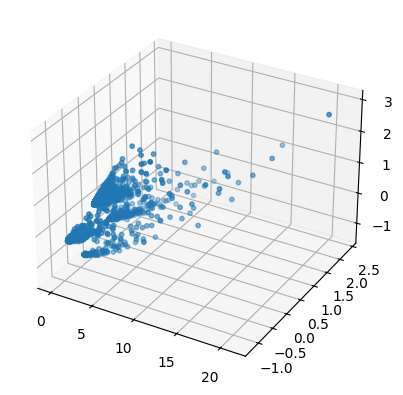

In [102]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(tocluster[0])
y = np.array(tocluster[1])
z = np.array(tocluster[2])

ax.scatter(x,y,z, marker=".", s=40, cmap="RdBu")

plt.show()

### Selecting number of K

In [111]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in tqdm(range(2,8)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    #scores.append(silhouette_score(tocluster, kmeans.labels_))

100%|██████████| 6/6 [00:00<00:00,  9.39it/s]


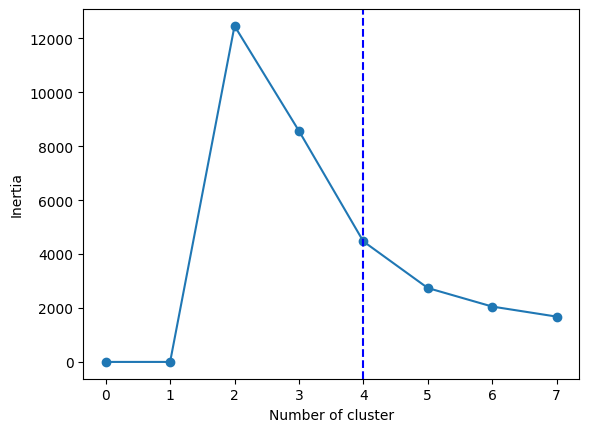

In [112]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

In [ ]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 8), scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Calculate and plot elbow curve
plt.subplot(1, 2, 2)
plt.plot(range(2, 8), inertia_list[2:8], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

## K Means clustering

In [114]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-0.01019726  0.00709389  0.01986487]
 [ 0.22018698 -0.86944123 -0.41001821]
 [ 5.67601584  0.18867239  0.39807428]
 [ 0.1536307   0.44747101 -0.84688018]]


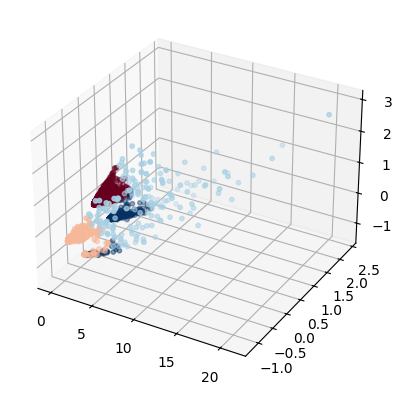

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(tocluster[0])
y = np.array(tocluster[1])
z = np.array(tocluster[2])

ax.scatter(x,y,z, marker=".",c = c_preds, s=40, cmap="RdBu")

plt.show()

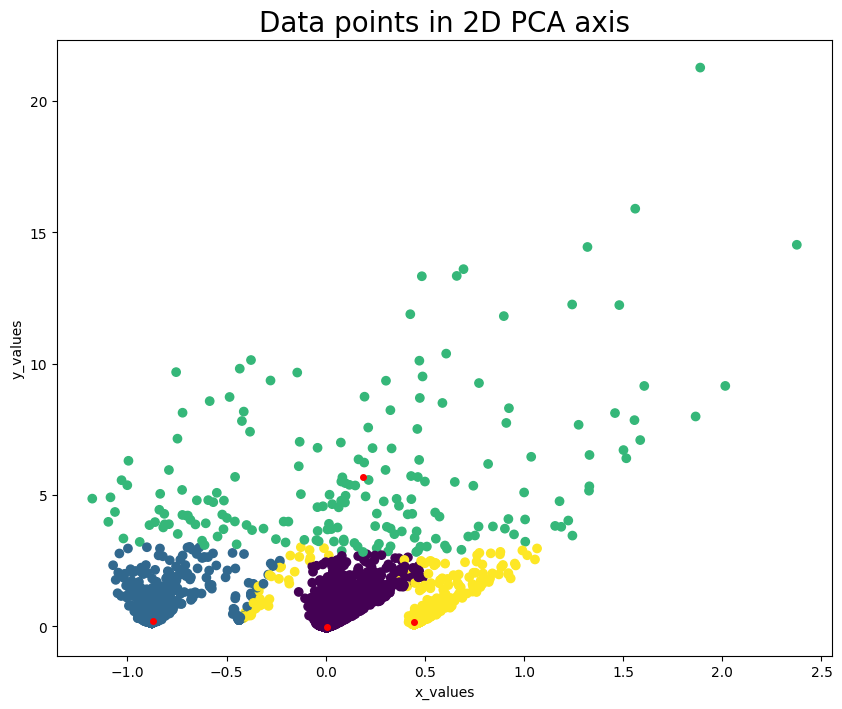

In [116]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], '.', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()


In [117]:
user_movie['cluster'] = c_preds

user_movie.head(10)

primaryTitle,10 Things I Hate About You,101 Dalmatians,12 Angry Men,12 Monkeys,12 Years a Slave,127 Hours,13 Reasons Why,17 Again,2 Fast 2 Furious,2001: A Space Odyssey,...,You Don't Mess with the Zohan,You've Got Mail,Your Name.,Zathura: A Space Adventure,Zero Dark Thirty,Zodiac,Zombieland,Zoolander,Zootopia,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
ur0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
user_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263404 entries, ur0000002 to ur9999853
Columns: 1562 entries, 10 Things I Hate About You to cluster
dtypes: int32(1), int64(1561)
memory usage: 3.1+ GB


Characteristic of each cluster

In [119]:
c0 = user_movie[user_movie['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_movie[user_movie['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_movie[user_movie['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_movie[user_movie['cluster']==3].drop('cluster',axis=1).mean()

In [120]:
# Cluster 0
c0.sort_values(ascending=False)[0:15]

primaryTitle
The Lord of the Rings: The Return of the King    0.009071
Fight Club                                       0.007808
The Godfather                                    0.006647
Pulp Fiction                                     0.006000
Schindler's List                                 0.003377
Fantastic Four                                   0.003008
12 Angry Men                                     0.002855
Oldboy                                           0.002800
Brokeback Mountain                               0.002679
Serenity                                         0.002502
Stranger Things                                  0.002479
The Phantom of the Opera                         0.002467
Star Wars: Episode VIII - The Last Jedi          0.002435
Warcraft                                         0.002369
Fifty Shades of Grey                             0.002361
dtype: float64

In [121]:
# Cluster 1
c1.sort_values(ascending=False)[0:15]

primaryTitle
The Dark Knight                                   1.000000
Iron Man                                          0.027877
Batman Begins                                     0.020967
The Lord of the Rings: The Return of the King     0.017393
The Godfather                                     0.017393
WALL·E                                            0.017393
The Bourne Ultimatum                              0.015964
Up                                                0.015964
The Incredible Hulk                               0.015011
Sweeney Todd: The Demon Barber of Fleet Street    0.014058
Pulp Fiction                                      0.013581
Live Free or Die Hard                             0.012390
Tropic Thunder                                    0.012390
Toy Story 3                                       0.012152
Zodiac                                            0.012152
dtype: float64

In [122]:
# Cluster 2
c2.sort_values(ascending=False)[0:15]

primaryTitle
The Dark Knight                    0.607527
The Girl with the Dragon Tattoo    0.532258
The King's Speech                  0.500000
The Godfather                      0.489247
The Social Network                 0.473118
The Shawshank Redemption           0.451613
Argo                               0.440860
Jurassic Park                      0.440860
12 Years a Slave                   0.435484
Toy Story 3                        0.430108
Pulp Fiction                       0.430108
Back to the Future                 0.408602
True Grit                          0.408602
Up                                 0.397849
Spotlight                          0.392473
dtype: float64

In [123]:
# Cluster 3
c3.sort_values(ascending=False)[0:30]

primaryTitle
The Shawshank Redemption                         0.997523
The Godfather                                    0.029973
Pulp Fiction                                     0.025514
Fight Club                                       0.021551
Schindler's List                                 0.018083
The Lord of the Rings: The Return of the King    0.014863
The Godfather Part II                            0.014367
The Silence of the Lambs                         0.012881
12 Angry Men                                     0.012138
The Terminator                                   0.011642
Goodfellas                                       0.011395
The Good, the Bad and the Ugly                   0.011147
Se7en                                            0.010899
Terminator 2: Judgment Day                       0.010651
Reservoir Dogs                                   0.010404
L.A. Confidential                                0.010156
The Dark Knight                                  0.010156
J

### Create a new user, add movies

In [ ]:
copy_df = user_movie.copy()
copy_df

In [ ]:
columns = copy_df.columns 
new_row = {col: 0 for col in columns }
liked_movie_columns = ['Terminator 2: Judgment Day', 'Fight Club', 'Zombieland']
for col in liked_movie_columns:
    new_row[col] = 1

new_user_id = 'ur00000000'
new_row['user_id'] = new_user_id

new_test_df = pd.DataFrame([new_row])
new_test_df.set_index('user_id', inplace=True)
new_test_df

In [ ]:
new_test_df.shape

In [ ]:
pca = PCA(n_components=1)
pca.fit(new_test_df)
pca_new_samples = pca.transform(new_test_df)

In [ ]:
ps_test = pd.DataFrame(pca_new_samples)

In [ ]:
ps_test.head

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tocluster)

new_user_cluster = kmeans.predict(new_user.reshape(1, -1))

print("New user belongs to cluster:", new_user_cluster[0])

In [ ]:
cluster_movies = cluster_data[cluster_data['Cluster_Label'] == new_user_cluster]

cluster_movies_sorted = cluster_movies.sort_values(by='overall_rating', ascending=False)

top_n_recommendations = cluster_movies_sorted.head(N)

print("Top Recommendations for You:")
print(top_n_recommendations[['primaryTitle', 'overall_rating']])